## Making Csv Data

In [1]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Create a DataFrame with 4 columns and 100 rows
data = {
    'ID': np.random.randint(1, 100, 1000),
    'CGPA': np.random.uniform(1.95, 5.0, 1000),
    'IQ': np.random.uniform(30, 100, 1000),
}

df = pd.DataFrame(data)

# Set Placement to 1 if CGPA or IQ is greater than 6.5, otherwise set to 0
df['Placement'] = ((df['CGPA'] > 3.25) | (df['IQ'] > 180)).astype(int)

# Display the DataFrame
print(df.head())


# Save the DataFrame to a CSV file
df.to_csv('Placement.csv', index=False)


   ID      CGPA         IQ  Placement
0  52  3.803043  49.579248          1
1  93  2.695277  95.967091          0
2  15  3.469655  91.133566          1
3  72  2.957563  41.323495          0
4  61  4.797760  85.039317          1


## Basic steps 

In [2]:
data = pd.read_csv("Placement.csv")
data

,ID,CGPA,IQ,Placement
0,52,3.803043,49.579248,1
1,93,2.695277,95.967091,0
2,15,3.469655,91.133566,1
3,72,2.957563,41.323495,0
4,61,4.797760,85.039317,1
...,...,...,...,...
995,42,3.111774,90.126968,0
996,41,3.006281,43.021610,0
997,6,2.679119,68.644856,0
998,52,3.504659,59.105825,1


In [3]:
#we dont need id so remove it
data = data.iloc[:,1:]
data

,CGPA,IQ,Placement
0,3.803043,49.579248,1
1,2.695277,95.967091,0
2,3.469655,91.133566,1
3,2.957563,41.323495,0
4,4.797760,85.039317,1
...,...,...,...
995,3.111774,90.126968,0
996,3.006281,43.021610,0
997,2.679119,68.644856,0
998,3.504659,59.105825,1


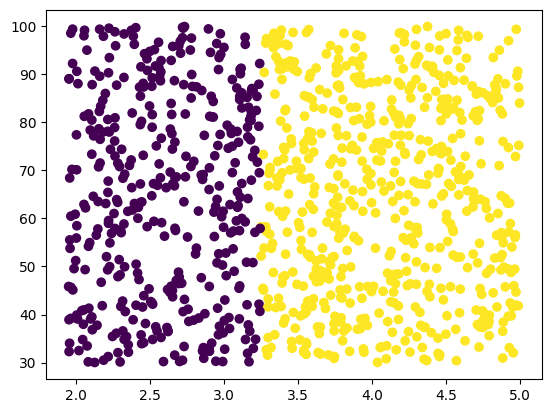

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['CGPA'],df['IQ'],c=data['Placement'])

In [5]:
X = data.iloc[:,0:2]#X is independent variables know as Features
X

,CGPA,IQ
0,3.803043,49.579248
1,2.695277,95.967091
2,3.469655,91.133566
3,2.957563,41.323495
4,4.797760,85.039317
...,...,...
995,3.111774,90.126968
996,3.006281,43.021610
997,2.679119,68.644856
998,3.504659,59.105825


In [6]:
y = data.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      1
      ..
995    0
996    0
997    0
998    1
999    1
Name: Placement, Length: 1000, dtype: int64

In [7]:
X.shape
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: Placement
Non-Null Count  Dtype
--------------  -----
1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [8]:
#training and testing we use sklearn 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [9]:
X_train

,CGPA,IQ
885,4.749145,37.308289
721,2.240548,56.896773
141,2.020219,32.489961
571,2.928265,81.117230
311,3.159781,79.017637
...,...,...
821,4.600147,77.652913
458,3.345168,85.901529
165,3.214239,34.847801
328,3.774772,93.273933


In [10]:
y_train

885    1
721    0
141    0
571    0
311    0
      ..
821    1
458    1
165    0
328    1
648    1
Name: Placement, Length: 900, dtype: int64

In [11]:
X_test

,CGPA,IQ
286,2.275065,87.759147
999,4.467123,80.375767
405,2.975930,98.464327
773,3.541277,68.176678
852,4.227971,51.832936
...,...,...
275,4.696746,64.061836
521,3.268334,45.087091
732,4.645314,65.817697
50,2.373416,72.178721


In [12]:
#Scale the values 
from sklearn.preprocessing import StandardScaler
#We create one object of this class
scaler = StandardScaler()


In [13]:
#fit transform learn the patterns then train it
X_train = scaler.fit_transform(X_train)
X_train

array([[ 1.445128  , -1.34795014],
       [-1.46333878, -0.39005537],
       [-1.71878772, -1.58357079],
       ...,
       [-0.33444144, -1.46827023],
       [ 0.31544084,  1.38882094],
       [ 0.41098317, -0.7312572 ]])

In [14]:
X_test = scaler.transform(X_test)
X_test

array([[-1.42331917,  1.11914285],
       [ 1.11815129,  0.75808885],
       [-0.61073686,  1.64263595],
       [ 0.04472587,  0.16154228],
       [ 0.84087892, -0.63768166],
       [ 0.51490558, -1.6007594 ],
       [-0.06482911,  0.25622528],
       [ 1.39424721, -1.17002723],
       [-0.12092065, -0.83508187],
       [ 0.40906166,  0.89166562],
       [-1.13108027, -0.26723889],
       [ 1.19892441,  0.08889819],
       [-0.78203186, -0.16283227],
       [ 1.2696291 ,  1.29759092],
       [-0.96599602,  0.17603869],
       [-1.41309919, -1.60481675],
       [-0.66635468,  0.95344247],
       [-1.62769256, -1.26092791],
       [-0.89739262,  1.12490834],
       [-1.33577638, -0.16549352],
       [ 1.61050747, -0.73376923],
       [-0.35560997, -0.68746681],
       [-0.90240677, -1.1865005 ],
       [ 0.85370181, -0.92181129],
       [-0.01263844,  0.27036717],
       [-0.63661843, -0.04391733],
       [-0.44285129,  0.11742439],
       [ 1.32647713, -0.73855313],
       [-0.37023837,

## We use logistic Regression 

In [15]:
from sklearn.linear_model import LogisticRegression
#again create a object 
clf = LogisticRegression()
#we use fit function for train the model we provide it traing data to it
#This is called model training


In [16]:
clf.fit(X_train ,y_train)

LogisticRegression()

In [17]:
# model evalution means you find the accuracy testing data
y_predict = clf.predict(X_test)
y_predict

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1], dtype=int64)

In [18]:
y_test

286    0
999    1
405    0
773    1
852    1
      ..
275    1
521    1
732    1
50     0
382    1
Name: Placement, Length: 100, dtype: int64

In [19]:
#Calculate the accuracy 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

1.0

# Visualising the patterns they do 


<Axes: >

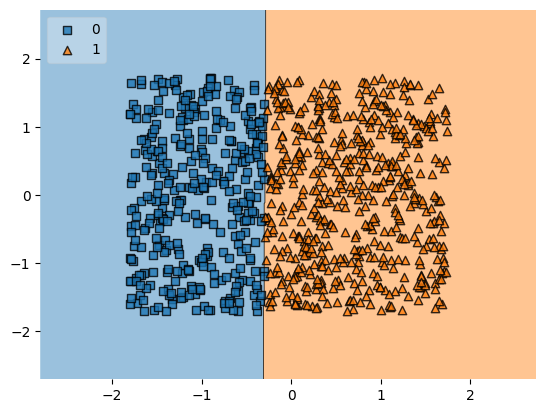

In [25]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

## SAVING THE MODEL

In [28]:
import pickle
pickle.dump(clf,open('Model.Selector','wb'))# wb means write a binnary mode

## Test my model on new data set 

In [48]:
# import joblib  # Assuming you used joblib to save your model

# # Load the saved model
# saved_model = joblib.load('Model.Selector')

# # New data for prediction
# new_data = [[CGPA == 3.4, IQ == 64]]  # Replace feature1, feature2, ... with actual feature values

# # Make predictions on the new data
# predictions = saved_model.predict(new_data)

# # Display the predictions
# print("Predictions:", predictions)
import joblib

# Load the saved multi-output model
multi_output_model = joblib.load('Model.Selector')

# New data for prediction
new_data = [['CGPA','IQ' ]]  # Replace feature1, feature2, ... with actual feature values

# Make predictions on the new data
predicted_values = multi_output_model.predict(new_data)

# Display the predictions
predicted_cgpa = predicted_values[0]  # Assuming CGPA is the first output
predicted_iq = predicted_values[1]  # Assuming IQ is the second output

print("Predicted CGPA:", predicted_cgpa)
print("Predicted IQ:", predicted_iq)

ValueError: dtype='numeric' is not compatible with arrays of bytes/strings.Convert your data to numeric values explicitly instead.